In [1]:
from datasets import load_dataset
import torch
import torch.optim as optim
from torch import nn
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from data_utils.dataset.dataset import MNISTDataset, UITVSFC, UITOCD
from models.bth4 import LSTM_Sequence_Label_TL, LSTM_Sequence_Label_bahdanau, LSTM

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load datasets
train_dataset = UITOCD(
    data_path= r"C:\Users\VIET HOANG - VTS\Downloads\UIT-ViOCD\UIT-ViOCD\train.json"
)

test_dataset = UITOCD(
    data_path= r"C:\Users\VIET HOANG - VTS\Downloads\UIT-ViOCD\UIT-ViOCD\test.json"
)

# Create dataloaders
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=1,
    shuffle=True
)

c:\Users\VIET HOANG - VTS\Desktop\VisionReader\cuda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Câu 1

Epoch 1:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 88.13it/s]


Epoch 2:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 88.11it/s]


Epoch 3:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 82.66it/s]


Epoch 4:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 82.67it/s]


Epoch 5:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 82.87it/s]


Epoch 6:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 83.74it/s]


Epoch 7:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 84.29it/s]


Epoch 8:


Evaluating Model 2: 100%|██████████| 549/549 [00:07<00:00, 78.12it/s]


Epoch 9:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 83.47it/s]


Epoch 10:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 83.11it/s]


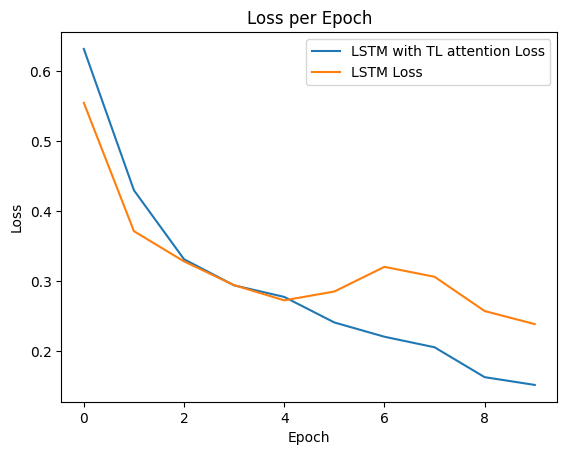

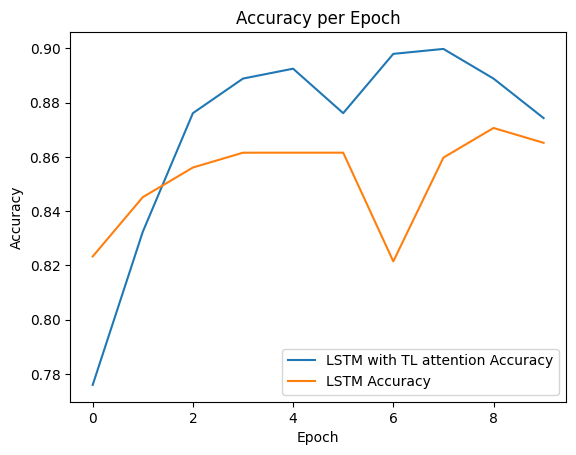

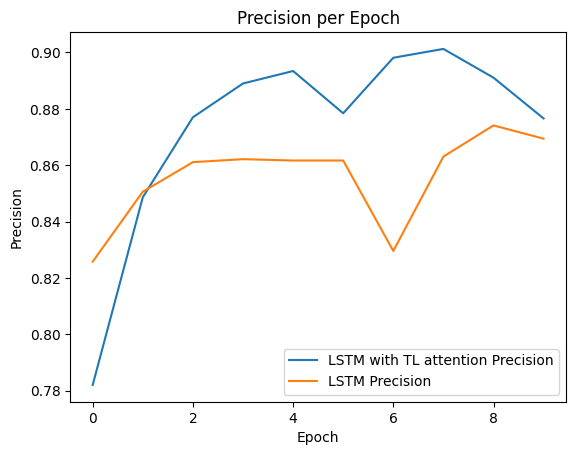

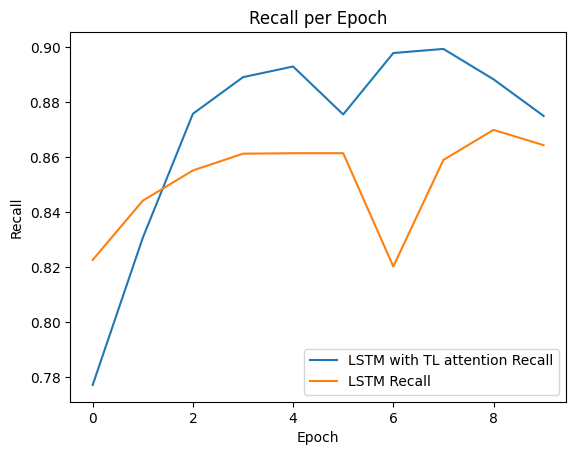

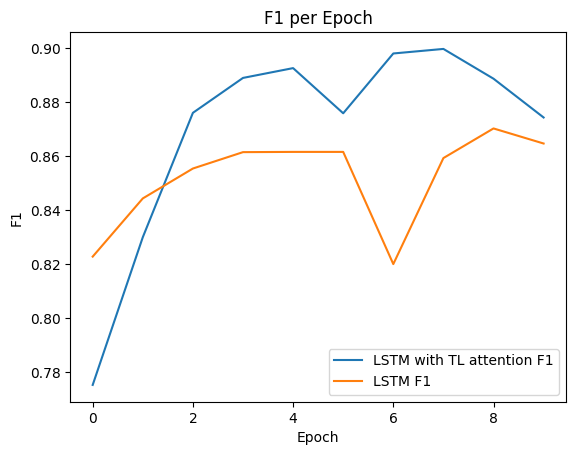

In [21]:
# Placeholder lists to store metrics for both models
vocab_size = train_dataset.vocab_size()
# d_model, layer_dim, hidden_dim, output_dim, dropout, vocab_size
model1 = LSTM_Sequence_Label_TL(256, 3, 256, 2, 0.2, vocab_size).to(device)
model2 = LSTM(vocab_size, 256, 256, 2, 3).to(device)
# Initialize optimizer and loss function
optimizer = optim.Adam(model1.parameters(), lr=3e-4)  # Learning rate set to 0.0003
optimizer2 = optim.Adam(model2.parameters(), lr=3e-4) 
loss_fn = nn.CrossEntropyLoss()
import matplotlib.pyplot as plt
metrics_model1 = {"accuracy": [], "precision": [], "recall": [], "f1": []}
metrics_model2 = {"accuracy": [], "precision": [], "recall": [], "f1": []}
loss_model1 = []
loss_model2 = []

# Training and evaluation loop for both models
for epoch in range(10):
    print(f"Epoch {epoch + 1}:")
    
    # Train model1
    model1.train()
    total_loss_model1 = 0
    for batch_item in tqdm(train_dataloader, desc="Training Model 1"):
        sent, sentiment = batch_item
        sent, sentiment = sent.to(device), sentiment.to(device)

        logits, loss = model1(sent, sentiment)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss_model1 += loss.item()
    loss_model1.append(total_loss_model1 / len(train_dataloader))
    
    # Train model2 (similar process but adjusted for model2)
    model2.train()
    total_loss_model2 = 0
    for batch_item in tqdm(train_dataloader, desc="Training Model 2"):
        sent, sentiment = batch_item
        sent, sentiment = sent.to(device), sentiment.to(device)

        logits = model2(sent)  # Forward pass for model2
        loss = loss_fn(logits, sentiment)
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()

        total_loss_model2 += loss.item()
    loss_model2.append(total_loss_model2 / len(train_dataloader))

    # Evaluation for model1
    predicted, gts = [], []
    model1.eval()
    with torch.no_grad():
        for batch_item in tqdm(test_dataloader, desc="Evaluating Model 1"):
            sent, sentiment = batch_item
            sent, sentiment = sent.to(device), sentiment.to(device)

            logits, _ = model1(sent, sentiment)
            predicted.extend(logits.argmax(dim=1).cpu().numpy())
            gts.extend(sentiment.cpu().numpy())

    predicted = np.array(predicted)
    gts = np.array(gts)
    metrics_model1["accuracy"].append(accuracy_score(gts, predicted))
    metrics_model1["precision"].append(precision_score(gts, predicted, average='macro', zero_division=1))
    metrics_model1["recall"].append(recall_score(gts, predicted, average='macro'))
    metrics_model1["f1"].append(f1_score(gts, predicted, average='macro'))

    # Evaluation for model2 (similar process)
    predicted, gts = [], []
    model2.eval()
    with torch.no_grad():
        for batch_item in tqdm(test_dataloader, desc="Evaluating Model 2"):
            sent, sentiment = batch_item
            sent, sentiment = sent.to(device), sentiment.to(device)

            logits = model2(sent)
            predicted.extend(logits.argmax(dim=1).cpu().numpy())
            gts.extend(sentiment.cpu().numpy())

    predicted = np.array(predicted)
    gts = np.array(gts)
    metrics_model2["accuracy"].append(accuracy_score(gts, predicted))
    metrics_model2["precision"].append(precision_score(gts, predicted, average='macro', zero_division=1))
    metrics_model2["recall"].append(recall_score(gts, predicted, average='macro'))
    metrics_model2["f1"].append(f1_score(gts, predicted, average='macro'))

# Visualizing losses and metrics
# Loss visualization
plt.figure()
plt.plot(loss_model1, label="LSTM with TL attention Loss")
plt.plot(loss_model2, label="LSTM Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Metrics visualization
for metric in ["accuracy", "precision", "recall", "f1"]:
    plt.figure()
    plt.plot(metrics_model1[metric], label=f"LSTM with TL attention {metric.capitalize()}")
    plt.plot(metrics_model2[metric], label=f"LSTM {metric.capitalize()}")
    plt.title(f"{metric.capitalize()} per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Câu 2

Epoch 1:


Evaluating Model 2: 100%|██████████| 549/549 [00:04<00:00, 116.78it/s]


Epoch 2:


Evaluating Model 2: 100%|██████████| 549/549 [00:04<00:00, 118.74it/s]


Epoch 3:


Evaluating Model 2: 100%|██████████| 549/549 [00:04<00:00, 115.41it/s]


Epoch 4:


Evaluating Model 2: 100%|██████████| 549/549 [00:04<00:00, 116.78it/s]


Epoch 5:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 81.33it/s]


Epoch 6:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 78.64it/s]


Epoch 7:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 80.43it/s]


Epoch 8:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 82.70it/s]


Epoch 9:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 88.18it/s]


Epoch 10:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 79.61it/s]


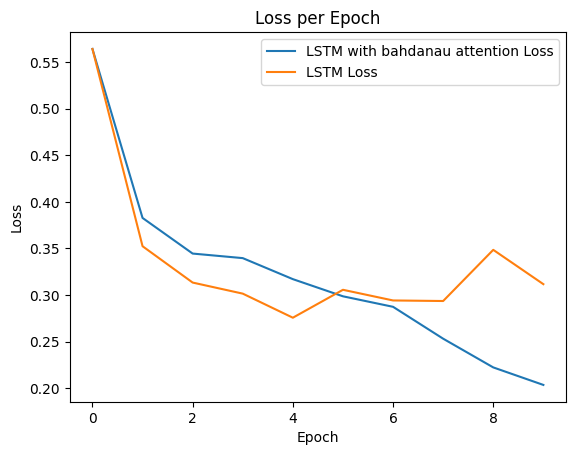

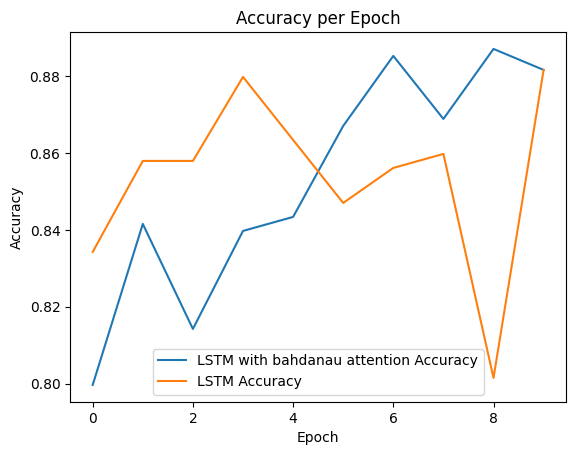

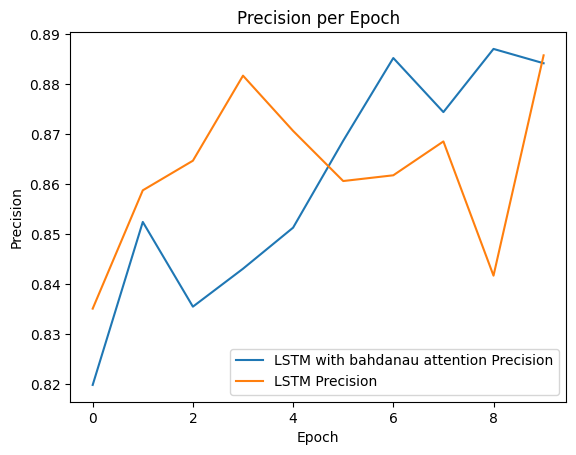

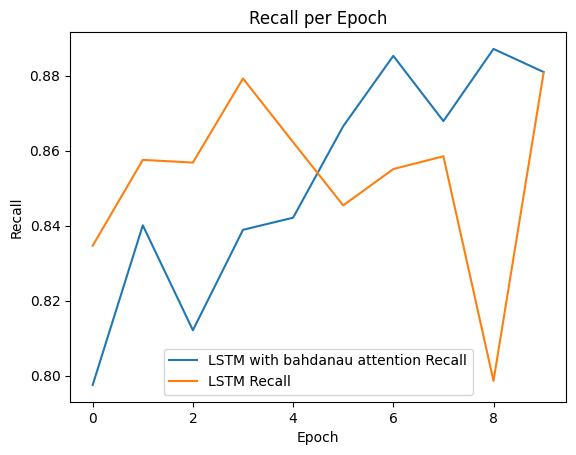

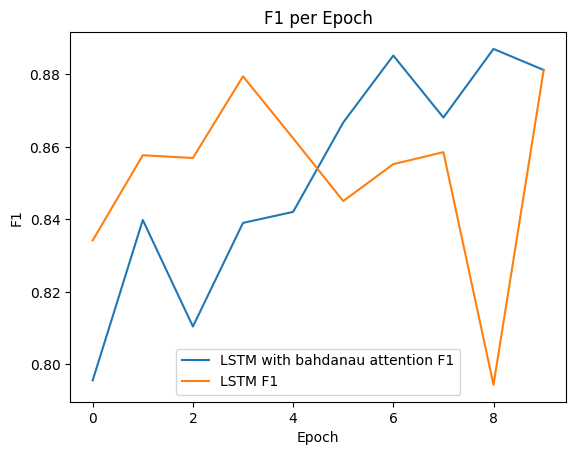

In [19]:
# Placeholder lists to store metrics for both models
vocab_size = train_dataset.vocab_size()
# d_model, layer_dim, hidden_dim, output_dim, dropout, vocab_size
model1 = LSTM_Sequence_Label_bahdanau(256, 3, 256, 2, 0.2, vocab_size).to(device)
model2 = LSTM(vocab_size, 256, 256, 2, 3).to(device)
# Initialize optimizer and loss function
optimizer = optim.Adam(model1.parameters(), lr=3e-4)  # Learning rate set to 0.0003
optimizer2 = optim.Adam(model2.parameters(), lr=3e-4) 
loss_fn = nn.CrossEntropyLoss()
import matplotlib.pyplot as plt
metrics_model1 = {"accuracy": [], "precision": [], "recall": [], "f1": []}
metrics_model2 = {"accuracy": [], "precision": [], "recall": [], "f1": []}
loss_model1 = []
loss_model2 = []

# Training and evaluation loop for both models
for epoch in range(10):
    print(f"Epoch {epoch + 1}:")
    
    # Train model1
    model1.train()
    total_loss_model1 = 0
    for batch_item in tqdm(train_dataloader, desc="Training Model 1"):
        sent, sentiment = batch_item
        sent, sentiment = sent.to(device), sentiment.to(device)

        logits, loss = model1(sent, sentiment)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss_model1 += loss.item()
    loss_model1.append(total_loss_model1 / len(train_dataloader))
    
    # Train model2 (similar process but adjusted for model2)
    model2.train()
    total_loss_model2 = 0
    for batch_item in tqdm(train_dataloader, desc="Training Model 2"):
        sent, sentiment = batch_item
        sent, sentiment = sent.to(device), sentiment.to(device)

        logits = model2(sent)  # Forward pass for model2
        loss = loss_fn(logits, sentiment)
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()

        total_loss_model2 += loss.item()
    loss_model2.append(total_loss_model2 / len(train_dataloader))

    # Evaluation for model1
    predicted, gts = [], []
    model1.eval()
    with torch.no_grad():
        for batch_item in tqdm(test_dataloader, desc="Evaluating Model 1"):
            sent, sentiment = batch_item
            sent, sentiment = sent.to(device), sentiment.to(device)

            logits, _ = model1(sent, sentiment)
            predicted.extend(logits.argmax(dim=1).cpu().numpy())
            gts.extend(sentiment.cpu().numpy())

    predicted = np.array(predicted)
    gts = np.array(gts)
    metrics_model1["accuracy"].append(accuracy_score(gts, predicted))
    metrics_model1["precision"].append(precision_score(gts, predicted, average='macro', zero_division=1))
    metrics_model1["recall"].append(recall_score(gts, predicted, average='macro'))
    metrics_model1["f1"].append(f1_score(gts, predicted, average='macro'))

    # Evaluation for model2 (similar process)
    predicted, gts = [], []
    model2.eval()
    with torch.no_grad():
        for batch_item in tqdm(test_dataloader, desc="Evaluating Model 2"):
            sent, sentiment = batch_item
            sent, sentiment = sent.to(device), sentiment.to(device)

            logits = model2(sent)
            predicted.extend(logits.argmax(dim=1).cpu().numpy())
            gts.extend(sentiment.cpu().numpy())

    predicted = np.array(predicted)
    gts = np.array(gts)
    metrics_model2["accuracy"].append(accuracy_score(gts, predicted))
    metrics_model2["precision"].append(precision_score(gts, predicted, average='macro', zero_division=1))
    metrics_model2["recall"].append(recall_score(gts, predicted, average='macro'))
    metrics_model2["f1"].append(f1_score(gts, predicted, average='macro'))

# Visualizing losses and metrics
# Loss visualization
plt.figure()
plt.plot(loss_model1, label="LSTM with bahdanau attention Loss")
plt.plot(loss_model2, label="LSTM Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Metrics visualization
for metric in ["accuracy", "precision", "recall", "f1"]:
    plt.figure()
    plt.plot(metrics_model1[metric], label=f"LSTM with bahdanau attention {metric.capitalize()}")
    plt.plot(metrics_model2[metric], label=f"LSTM {metric.capitalize()}")
    plt.title(f"{metric.capitalize()} per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Câu 3

Epoch 1:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 83.74it/s]


[0.8415300546448088]
[0.8069216757741348]
Epoch 2:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 84.18it/s]


[0.8415300546448088, 0.8597449908925319]
[0.8069216757741348, 0.8524590163934426]
Epoch 3:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 81.48it/s]


[0.8415300546448088, 0.8597449908925319, 0.8561020036429873]
[0.8069216757741348, 0.8524590163934426, 0.8615664845173042]
Epoch 4:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 81.17it/s]


[0.8415300546448088, 0.8597449908925319, 0.8561020036429873, 0.8797814207650273]
[0.8069216757741348, 0.8524590163934426, 0.8615664845173042, 0.8469945355191257]
Epoch 5:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 84.48it/s]


[0.8415300546448088, 0.8597449908925319, 0.8561020036429873, 0.8797814207650273, 0.8706739526411658]
[0.8069216757741348, 0.8524590163934426, 0.8615664845173042, 0.8469945355191257, 0.8888888888888888]
Epoch 6:


Evaluating Model 2: 100%|██████████| 549/549 [00:19<00:00, 28.08it/s]


[0.8415300546448088, 0.8597449908925319, 0.8561020036429873, 0.8797814207650273, 0.8706739526411658, 0.8451730418943534]
[0.8069216757741348, 0.8524590163934426, 0.8615664845173042, 0.8469945355191257, 0.8888888888888888, 0.8779599271402551]
Epoch 7:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 81.48it/s]


[0.8415300546448088, 0.8597449908925319, 0.8561020036429873, 0.8797814207650273, 0.8706739526411658, 0.8451730418943534, 0.8852459016393442]
[0.8069216757741348, 0.8524590163934426, 0.8615664845173042, 0.8469945355191257, 0.8888888888888888, 0.8779599271402551, 0.8961748633879781]
Epoch 8:


Evaluating Model 2: 100%|██████████| 549/549 [00:07<00:00, 75.43it/s]


[0.8415300546448088, 0.8597449908925319, 0.8561020036429873, 0.8797814207650273, 0.8706739526411658, 0.8451730418943534, 0.8852459016393442, 0.8615664845173042]
[0.8069216757741348, 0.8524590163934426, 0.8615664845173042, 0.8469945355191257, 0.8888888888888888, 0.8779599271402551, 0.8961748633879781, 0.8888888888888888]
Epoch 9:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 80.51it/s]


[0.8415300546448088, 0.8597449908925319, 0.8561020036429873, 0.8797814207650273, 0.8706739526411658, 0.8451730418943534, 0.8852459016393442, 0.8615664845173042, 0.8943533697632058]
[0.8069216757741348, 0.8524590163934426, 0.8615664845173042, 0.8469945355191257, 0.8888888888888888, 0.8779599271402551, 0.8961748633879781, 0.8888888888888888, 0.8979963570127505]
Epoch 10:


Evaluating Model 2: 100%|██████████| 549/549 [00:06<00:00, 80.75it/s]


[0.8415300546448088, 0.8597449908925319, 0.8561020036429873, 0.8797814207650273, 0.8706739526411658, 0.8451730418943534, 0.8852459016393442, 0.8615664845173042, 0.8943533697632058, 0.9016393442622951]
[0.8069216757741348, 0.8524590163934426, 0.8615664845173042, 0.8469945355191257, 0.8888888888888888, 0.8779599271402551, 0.8961748633879781, 0.8888888888888888, 0.8979963570127505, 0.8943533697632058]


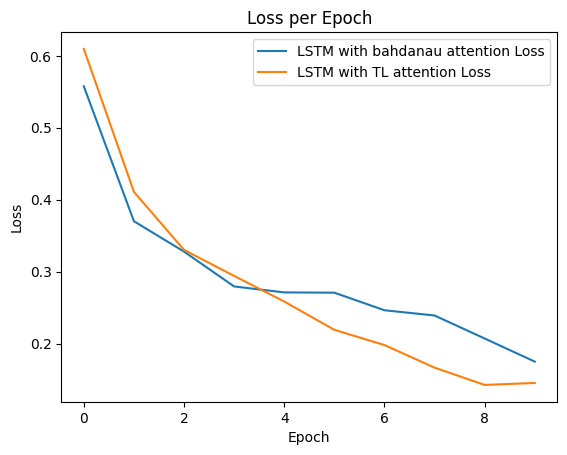

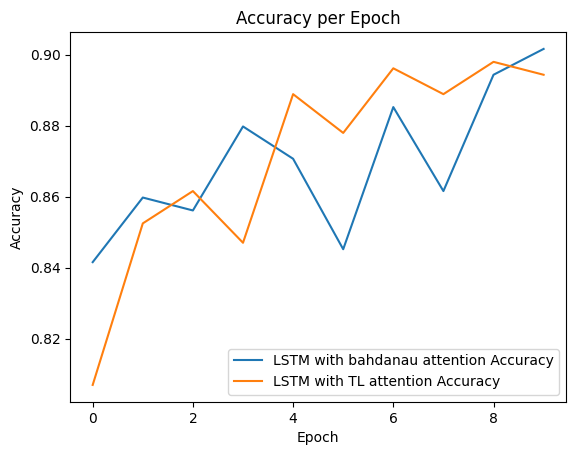

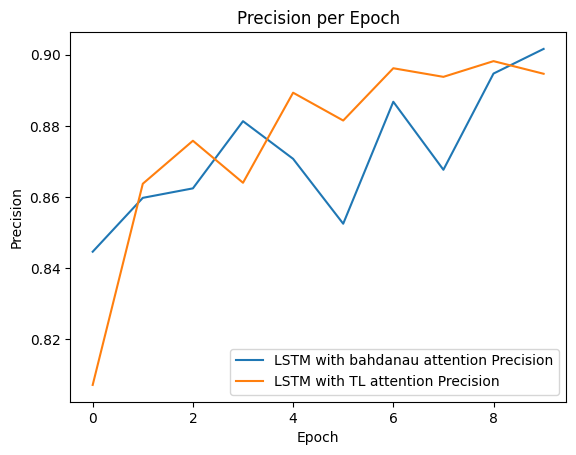

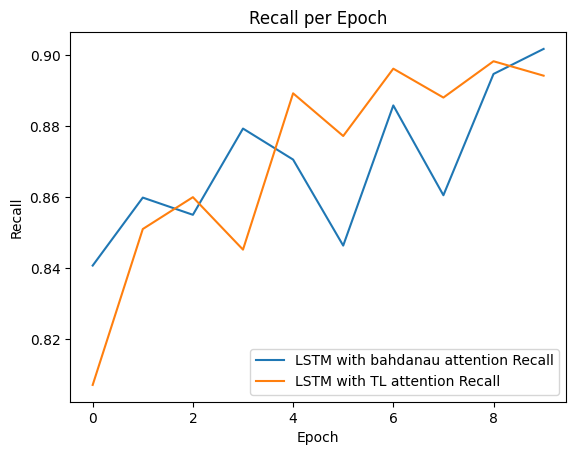

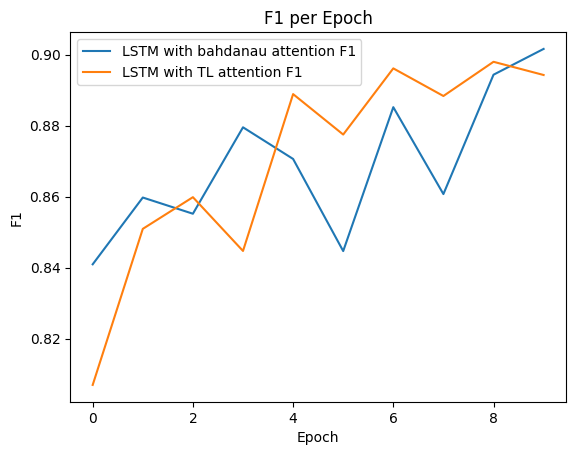

In [20]:
# Placeholder lists to store metrics for both models
vocab_size = train_dataset.vocab_size()
# d_model, layer_dim, hidden_dim, output_dim, dropout, vocab_size
model1 = LSTM_Sequence_Label_bahdanau(256, 3, 256, 2, 0.2, vocab_size).to(device)
model2 = LSTM_Sequence_Label_TL(256, 3, 256, 2, 0.2, vocab_size).to(device)
# Initialize optimizer and loss function
optimizer = optim.Adam(model1.parameters(), lr=3e-4)  # Learning rate set to 0.0003
optimizer2 = optim.Adam(model2.parameters(), lr=3e-4)
loss_fn = nn.CrossEntropyLoss()
import matplotlib.pyplot as plt
metrics_model1 = {"accuracy": [], "precision": [], "recall": [], "f1": []}
metrics_model2 = {"accuracy": [], "precision": [], "recall": [], "f1": []}
loss_model1 = []
loss_model2 = []

# Training and evaluation loop for both models
for epoch in range(10):
    print(f"Epoch {epoch + 1}:")
    
    # Train model1
    model1.train()
    total_loss_model1 = 0
    for batch_item in tqdm(train_dataloader, desc="Training Model 1"):
        sent, sentiment = batch_item
        sent, sentiment = sent.to(device), sentiment.to(device)

        logits, loss = model1(sent, sentiment)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss_model1 += loss.item()
    loss_model1.append(total_loss_model1 / len(train_dataloader))
    
    # Train model2 (similar process but adjusted for model2)
    model2.train()
    total_loss_model2 = 0
    for batch_item in tqdm(train_dataloader, desc="Training Model 2"):
        sent, sentiment = batch_item
        sent, sentiment = sent.to(device), sentiment.to(device)

        logits, loss = model2(sent, sentiment) # Forward pass for model2
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()

        total_loss_model2 += loss.item()
    loss_model2.append(total_loss_model2 / len(train_dataloader))

    # Evaluation for model1
    predicted, gts = [], []
    model1.eval()
    with torch.no_grad():
        for batch_item in tqdm(test_dataloader, desc="Evaluating Model 1"):
            sent, sentiment = batch_item
            sent, sentiment = sent.to(device), sentiment.to(device)

            logits, _ = model1(sent, sentiment)
            predicted.extend(logits.argmax(dim=1).cpu().numpy())
            gts.extend(sentiment.cpu().numpy())

    predicted = np.array(predicted)
    gts = np.array(gts)
    metrics_model1["accuracy"].append(accuracy_score(gts, predicted))
    metrics_model1["precision"].append(precision_score(gts, predicted, average='macro', zero_division=1))
    metrics_model1["recall"].append(recall_score(gts, predicted, average='macro'))
    metrics_model1["f1"].append(f1_score(gts, predicted, average='macro'))

    # Evaluation for model2 (similar process)
    predicted, gts = [], []
    model2.eval()
    with torch.no_grad():
        for batch_item in tqdm(test_dataloader, desc="Evaluating Model 2"):
            sent, sentiment = batch_item
            sent, sentiment = sent.to(device), sentiment.to(device)

            logits, _ = model2(sent, sentiment)
            predicted.extend(logits.argmax(dim=1).cpu().numpy())
            gts.extend(sentiment.cpu().numpy())

    predicted = np.array(predicted)
    gts = np.array(gts)
    metrics_model2["accuracy"].append(accuracy_score(gts, predicted))
    metrics_model2["precision"].append(precision_score(gts, predicted, average='macro', zero_division=1))
    metrics_model2["recall"].append(recall_score(gts, predicted, average='macro'))
    metrics_model2["f1"].append(f1_score(gts, predicted, average='macro'))
    print(metrics_model1["accuracy"])
    print(metrics_model2["accuracy"])
# Visualizing losses and metrics
# Loss visualization
plt.figure()
plt.plot(loss_model1, label="LSTM with bahdanau attention Loss")
plt.plot(loss_model2, label="LSTM with TL attention Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Metrics visualization
for metric in ["accuracy", "precision", "recall", "f1"]:
    plt.figure()
    plt.plot(metrics_model1[metric], label=f"LSTM with bahdanau attention {metric.capitalize()}")
    plt.plot(metrics_model2[metric], label=f"LSTM with TL attention {metric.capitalize()}")
    plt.title(f"{metric.capitalize()} per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()